In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from random import random
from scipy.interpolate import interp1d
import numpy as np
from time import sleep
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [2]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from random import random
from scipy.interpolate import interp1d
import numpy as np
from time import sleep

In [3]:
sns.set(rc={"figure.figsize":(18, 9)}) 

In [4]:
with open('data/dados_discentes.json', 'r') as f:
    data = json.load(f)
data

[{'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Modalidade de Educação de Jovens e Adultos'},
   {'valor': 'Integrado - EJA'},
   {'valor': 'Presencial'},
   {'valor': 'M'},
   {'valor': 'Ensino Médio'},
   {'valor': '1 Sm < Rfp <= 1,5 Sm'},
   {'valor': 'Preta'},
   {'valor': '1979'},
   {'valor': 'Concluído'}]},
 {'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Modalidade de Educação de Jovens e Adultos'},
   {'valor': 'Integrado - EJA'},
   {'valor': 'Presencial'},
   {'valor': 'F'},
   {'valor': 'Ensino Médio'},
   {'valor': '1,5 Sm < Rfp <= 2,5 Sm'},
   {'valor': 'Parda'},
   {'valor': '1985'},
   {'valor': 'Concludente'}]},
 {'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Moda

In [5]:
df = {
    'campus': [],
    'ano': [],
    'semestre': [],
    'curso': [],
    'tipo_curso': [],
    'modalidade': [],
    'sexo': [],
    'escolaridade': [],
    'algo': [],
    'cor': [],
    'nascimento': [],
    'status': []
}

for itens in data:
    item = itens['itens']
    df['campus'].append(item[0]['valor'])
    df['ano'].append(item[1]['valor'])
    df['semestre'].append(item[2]['valor'])
    df['curso'].append(item[3]['valor'])
    df['tipo_curso'].append(item[4]['valor'])
    df['modalidade'].append(item[5]['valor'])
    df['sexo'].append(item[6]['valor'])
    df['escolaridade'].append(item[7]['valor'])
    df['algo'].append(item[8]['valor'])
    df['cor'].append(item[9]['valor'])
    df['nascimento'].append(item[10]['valor'])
    df['status'].append(item[11]['valor'])

df.keys()

dict_keys(['campus', 'ano', 'semestre', 'curso', 'tipo_curso', 'modalidade', 'sexo', 'escolaridade', 'algo', 'cor', 'nascimento', 'status'])

In [6]:
df = pd.DataFrame(df)
df

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,algo,cor,nascimento,status
0,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1979,Concluído
1,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1985,Concludente
2,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1980,Concluído
3,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,Não Informado,Não dispõe da informação,1989,Evasão
4,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1981,Concluído
...,...,...,...,...,...,...,...,...,...,...,...,...
63630,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão
63631,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1988,Evasão
63632,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Parda,1986,Evasão
63633,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão


In [7]:
classes = []

for renda in df['algo']:
    if renda not in classes:
        classes.append(renda)

rename_renda = lambda x: classes.index(x)

df['renda'] = df['algo'].apply(rename_renda)
df = df.drop(columns=['algo'])


In [8]:
numericos = ['ano', 'semestre', 'nascimento']

df[numericos] = df[numericos].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63635 entries, 0 to 63634
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   campus        63635 non-null  object
 1   ano           63635 non-null  int64 
 2   semestre      63635 non-null  int64 
 3   curso         63635 non-null  object
 4   tipo_curso    63635 non-null  object
 5   modalidade    63635 non-null  object
 6   sexo          63635 non-null  object
 7   escolaridade  63635 non-null  object
 8   cor           63635 non-null  object
 9   nascimento    63635 non-null  int64 
 10  status        63635 non-null  object
 11  renda         63635 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 5.8+ MB


In [9]:
categoricos = [col for col in df.columns if col not in numericos and col != 'status']

df_posprocessing = df.copy()
df_posprocessing = df_posprocessing.drop(columns=categoricos)

ohc = pd.get_dummies(df[categoricos])

df_posprocessing[ohc.columns] = ohc
df_posprocessing




/home/filipe/.local/lib/python3.8/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


,ano,semestre,nascimento,status,renda,campus_Câmpus Anápolis,campus_Câmpus Aparecida de Goiânia,campus_Câmpus Cidade de Goiás,campus_Câmpus Formosa,campus_Câmpus Goiânia,...,escolaridade_Pós-Graduação Lato Sensu,escolaridade_Pós-Graduação Stricto Sensu,escolaridade_Superior,cor_Amarela,cor_Branca,cor_Indígena,cor_Não dispõe da informação,cor_Não quis declarar cor/raça,cor_Parda,cor_Preta
0,2014,1,1979,Concluído,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,1,1985,Concludente,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2014,1,1980,Concluído,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2014,1,1989,Evasão,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2014,1,1981,Concluído,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63630,2015,2,1988,Evasão,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63631,2015,2,1988,Evasão,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63632,2015,2,1986,Evasão,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63633,2015,2,1988,Evasão,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
df_posprocessing[['semestre']].describe()

,semestre
count,63635.000000
mean,1.290045
std,0.455066
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [11]:
for col in numericos:
    df_posprocessing[col] = (df_posprocessing[col] - df_posprocessing[col].min()) / (df_posprocessing[col].max() - df_posprocessing[col].min())

In [12]:
df_posprocessing[numericos]

,ano,semestre,nascimento
0,0.428571,0.5,0.014911
1,0.428571,0.5,0.016044
2,0.428571,0.5,0.015100
3,0.428571,0.5,0.016799
4,0.428571,0.5,0.015289
...,...,...,...
63630,0.500000,1.0,0.016610
63631,0.500000,1.0,0.016610
63632,0.500000,1.0,0.016233
63633,0.500000,1.0,0.016610


In [13]:
df_posprocessing

,ano,semestre,nascimento,status,renda,campus_Câmpus Anápolis,campus_Câmpus Aparecida de Goiânia,campus_Câmpus Cidade de Goiás,campus_Câmpus Formosa,campus_Câmpus Goiânia,...,escolaridade_Pós-Graduação Lato Sensu,escolaridade_Pós-Graduação Stricto Sensu,escolaridade_Superior,cor_Amarela,cor_Branca,cor_Indígena,cor_Não dispõe da informação,cor_Não quis declarar cor/raça,cor_Parda,cor_Preta
0,0.428571,0.5,0.014911,Concluído,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.428571,0.5,0.016044,Concludente,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.428571,0.5,0.015100,Concluído,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.428571,0.5,0.016799,Evasão,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.428571,0.5,0.015289,Concluído,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63630,0.500000,1.0,0.016610,Evasão,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63631,0.500000,1.0,0.016610,Evasão,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63632,0.500000,1.0,0.016233,Evasão,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63633,0.500000,1.0,0.016610,Evasão,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
df_posprocessing
# df_posprocessing

,ano,semestre,nascimento,status,renda,campus_Câmpus Anápolis,campus_Câmpus Aparecida de Goiânia,campus_Câmpus Cidade de Goiás,campus_Câmpus Formosa,campus_Câmpus Goiânia,...,escolaridade_Pós-Graduação Lato Sensu,escolaridade_Pós-Graduação Stricto Sensu,escolaridade_Superior,cor_Amarela,cor_Branca,cor_Indígena,cor_Não dispõe da informação,cor_Não quis declarar cor/raça,cor_Parda,cor_Preta
0,0.428571,0.5,0.014911,Concluído,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.428571,0.5,0.016044,Concludente,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.428571,0.5,0.015100,Concluído,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.428571,0.5,0.016799,Evasão,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.428571,0.5,0.015289,Concluído,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63630,0.500000,1.0,0.016610,Evasão,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63631,0.500000,1.0,0.016610,Evasão,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63632,0.500000,1.0,0.016233,Evasão,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63633,0.500000,1.0,0.016610,Evasão,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Analise dos Dados

In [15]:

def plot_count(df, column):
    sns.countplot(df[column])
    plt.xticks(rotation=90)

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


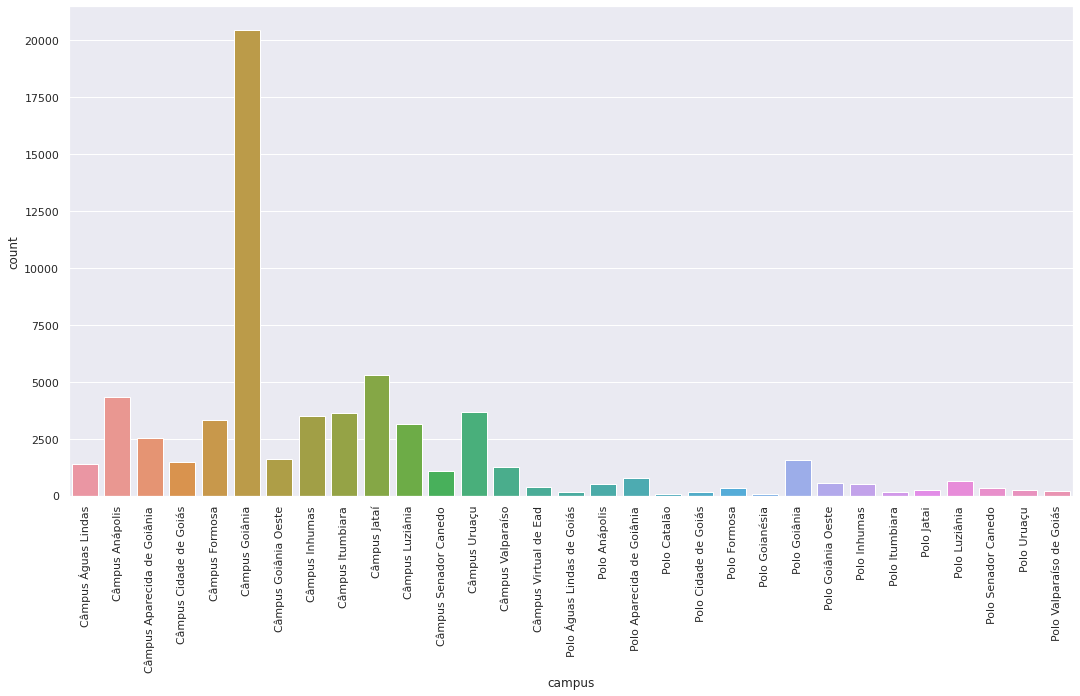

In [16]:
plot_count(df, 'campus')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


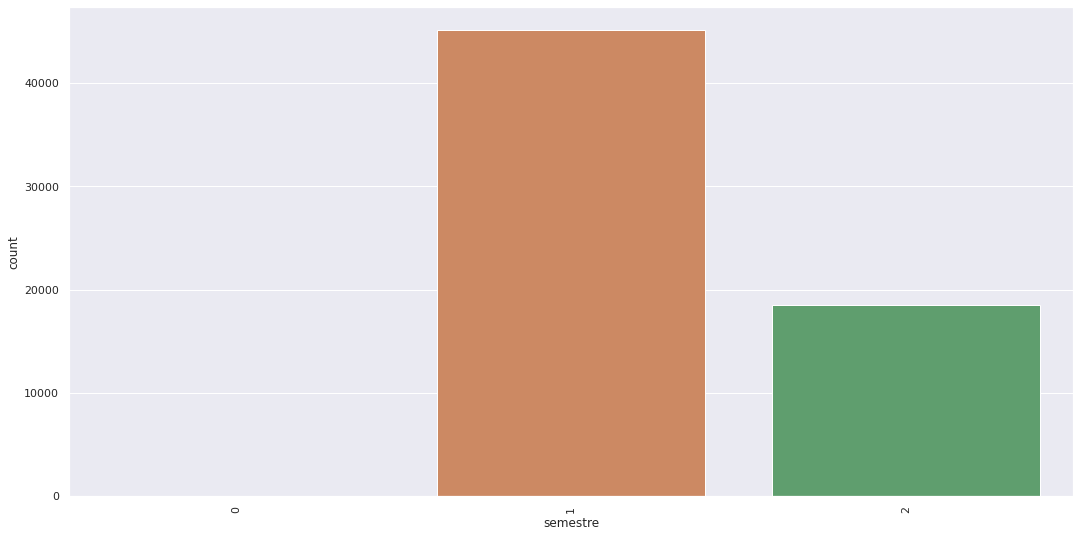

In [17]:
plot_count(df, 'semestre')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


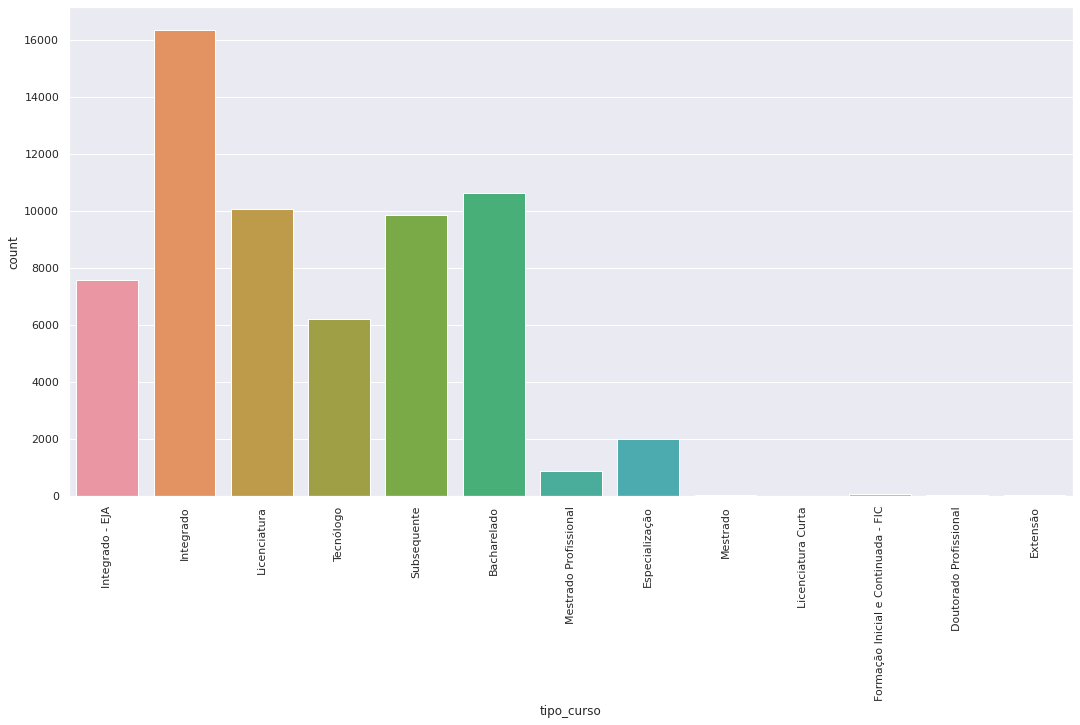

In [18]:
plot_count(df, 'tipo_curso')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


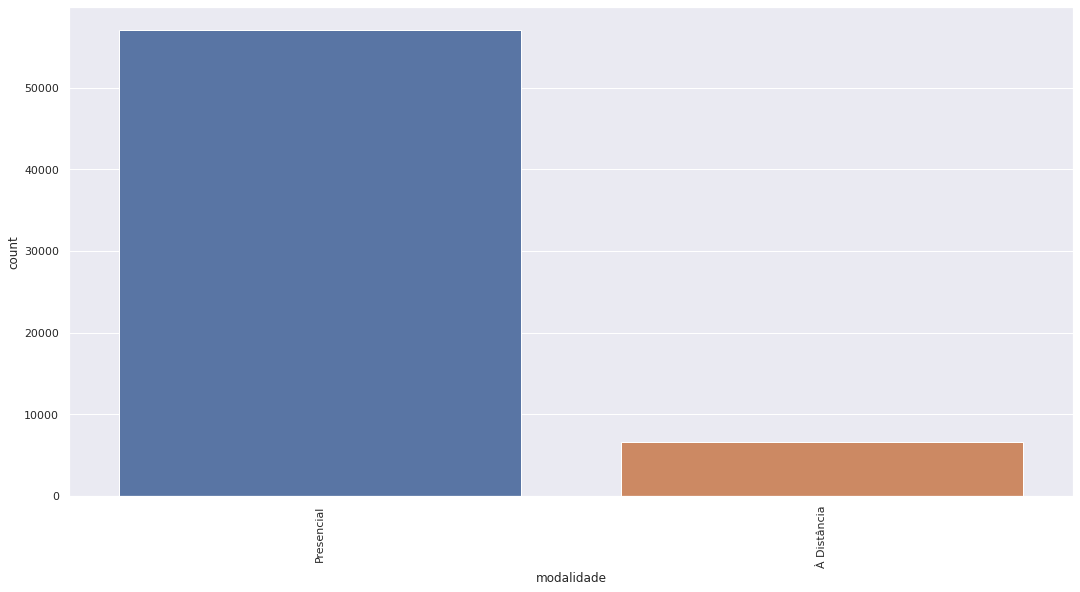

In [19]:
plot_count(df, 'modalidade')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


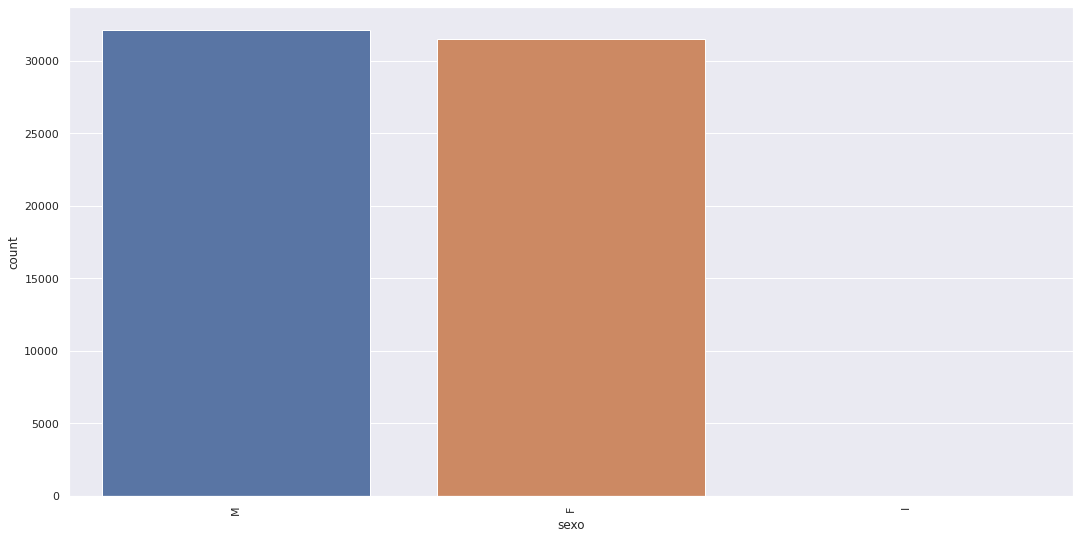

In [20]:
plot_count(df, 'sexo')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


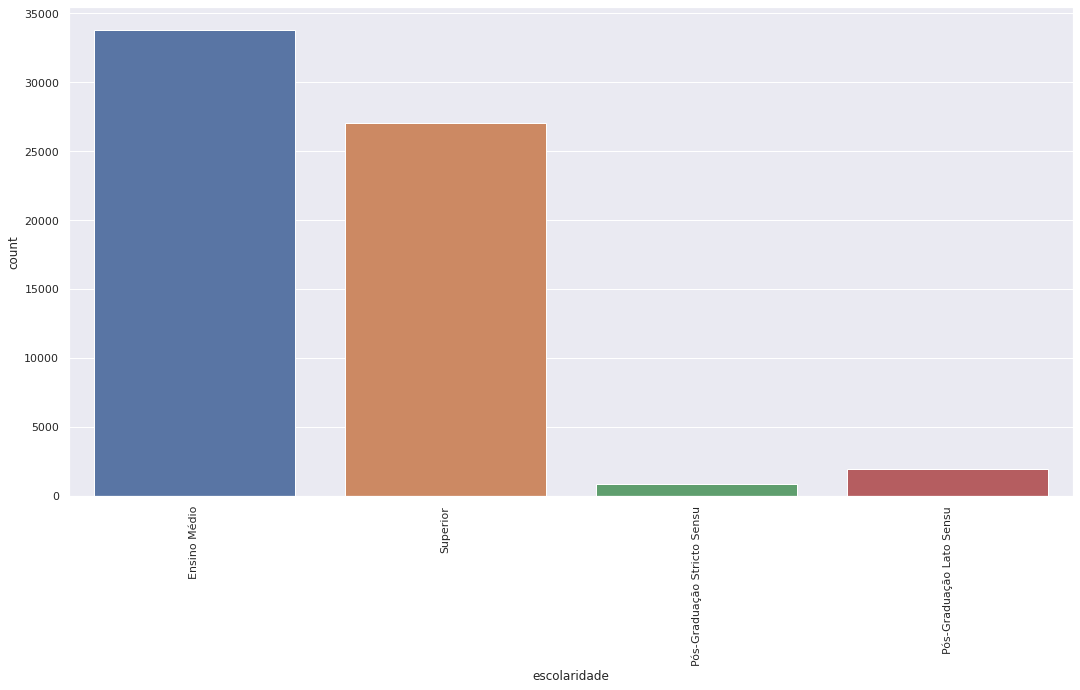

In [21]:
plot_count(df, 'escolaridade')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


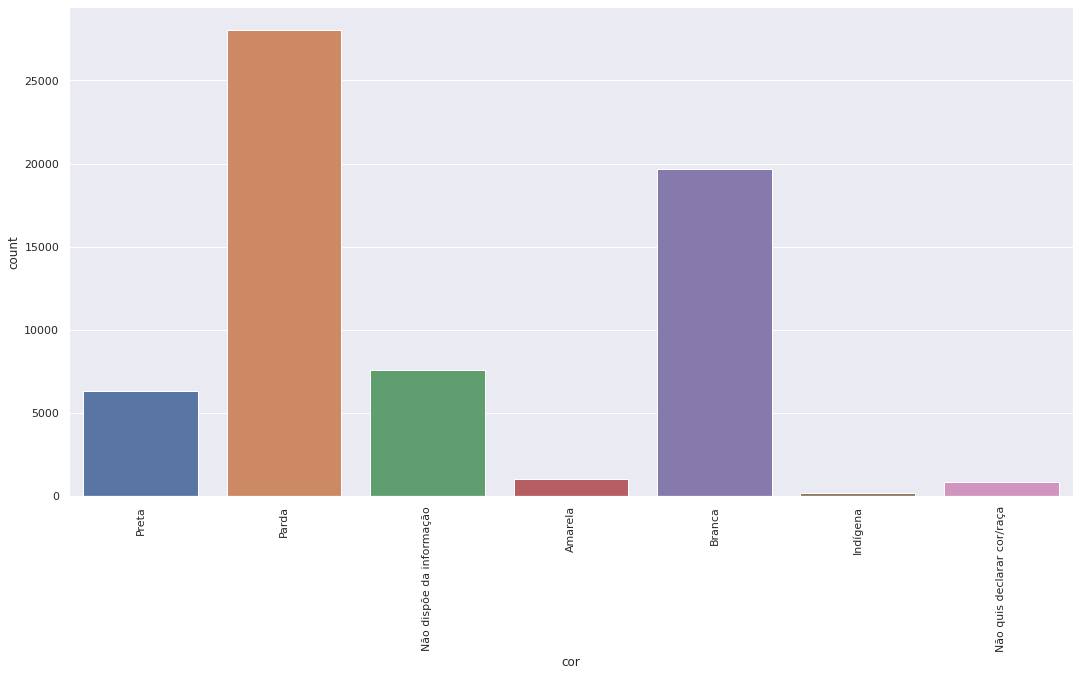

In [22]:
plot_count(df, 'cor')


/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


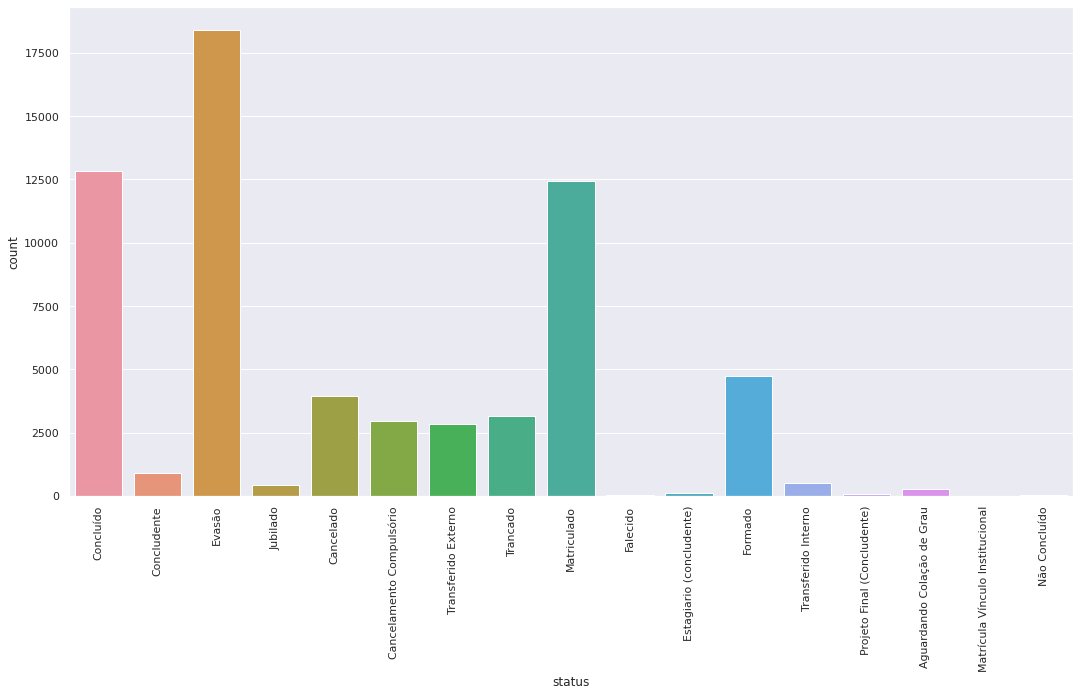

In [23]:
plot_count(df, 'status')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


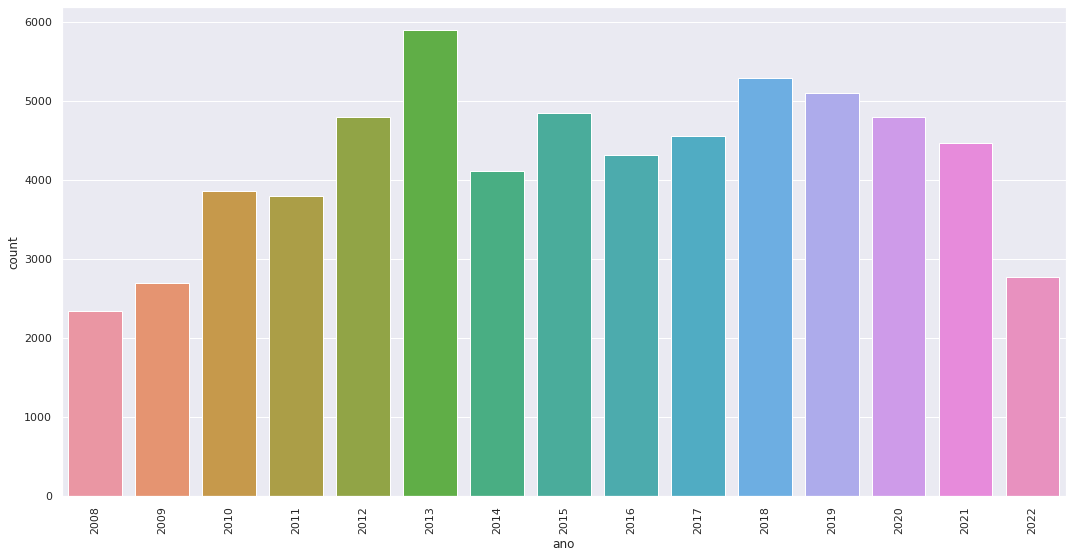

In [24]:
plot_count(df, 'ano')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


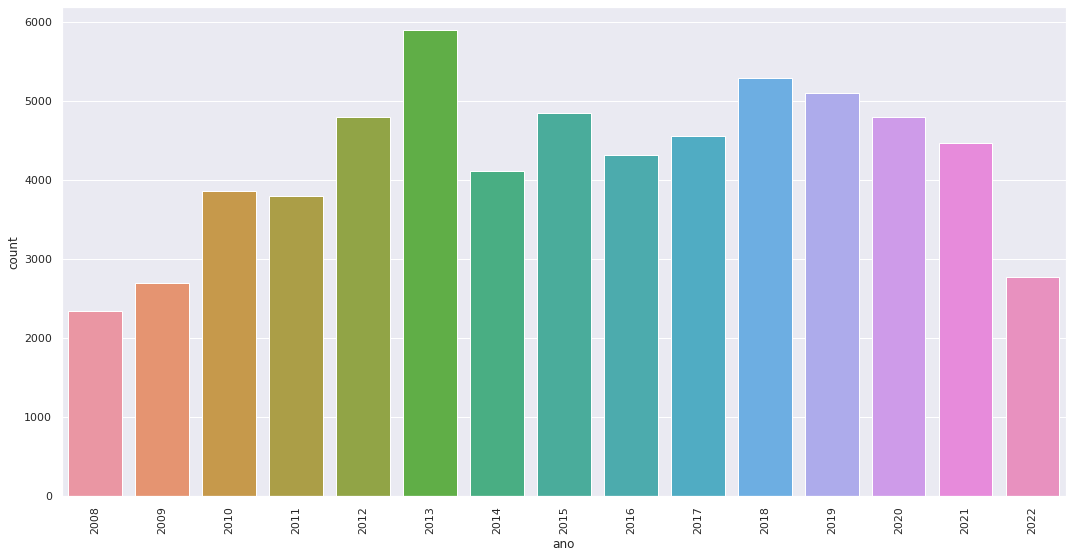

In [25]:
plot_count(df, 'ano')

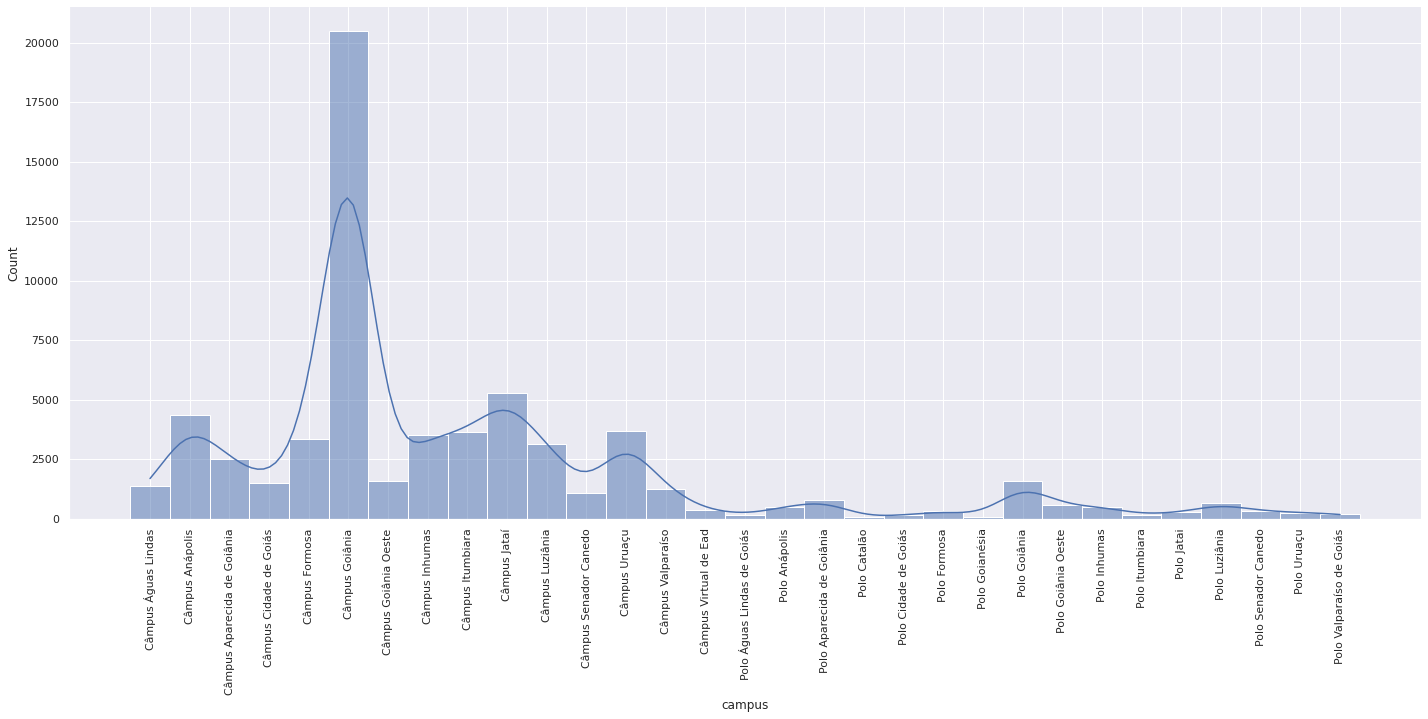

In [26]:
sns.displot(df['campus'], kde=True, height=8, aspect=2.5)
plt.xticks(rotation=90)
plt.show()

(1940.0, 2022.0)

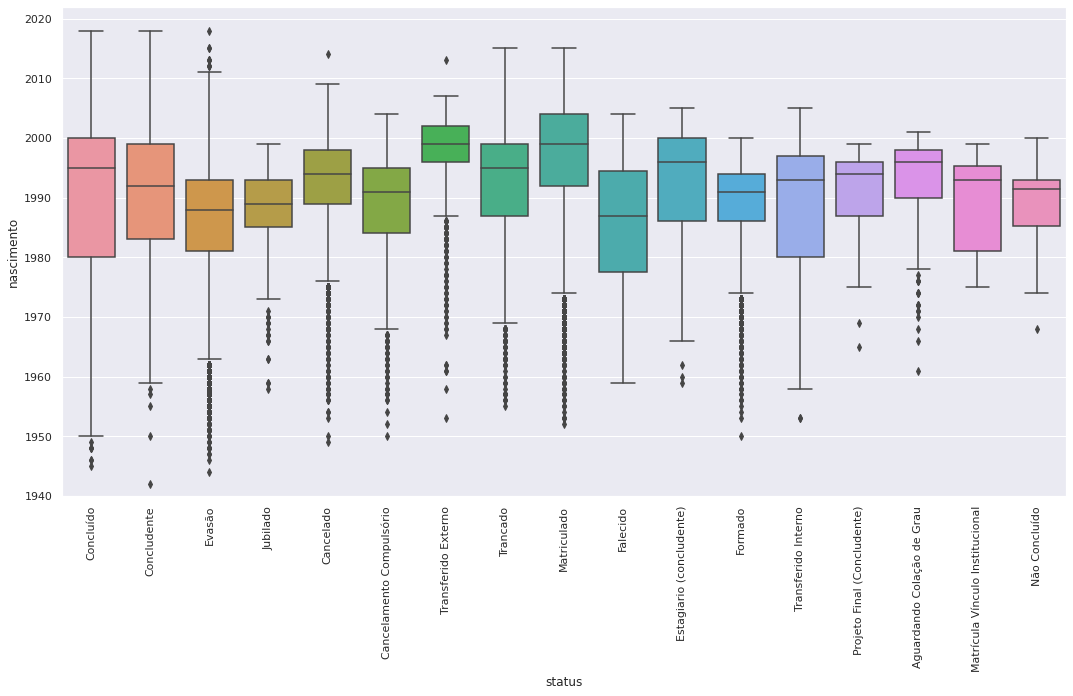

In [27]:
ax = sns.boxplot(x=df['status'],y=df['nascimento'])
plt.xticks(rotation=90)
plt.ylim([1940,2022])

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


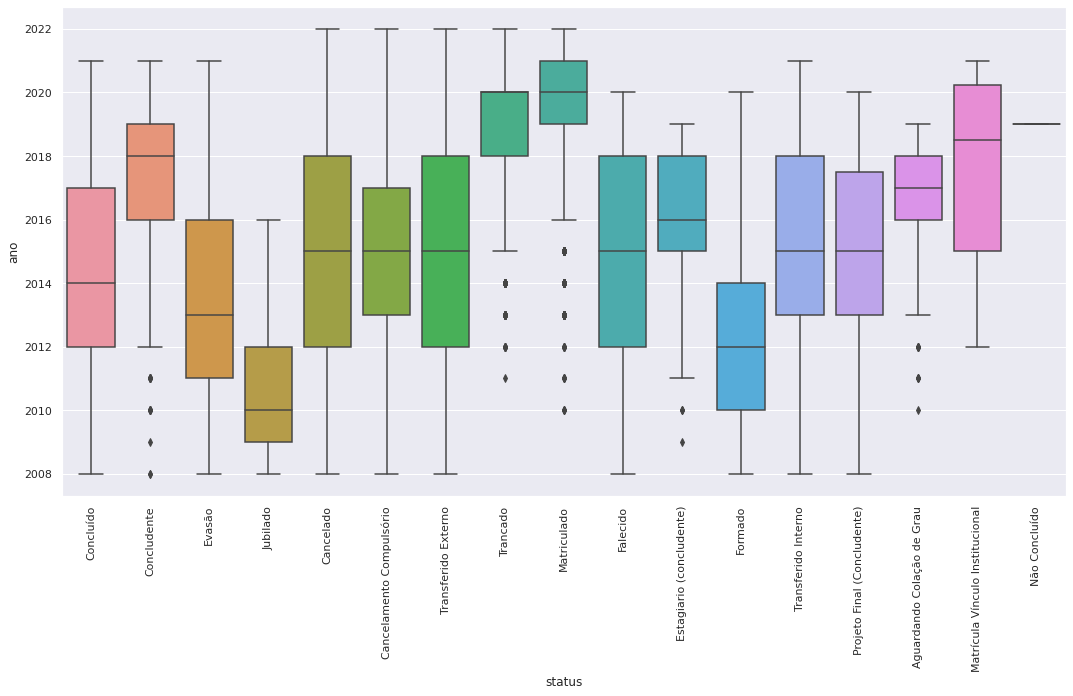

In [28]:
ax = sns.boxplot(df['status'],df['ano'])
plt.xticks(rotation=90);

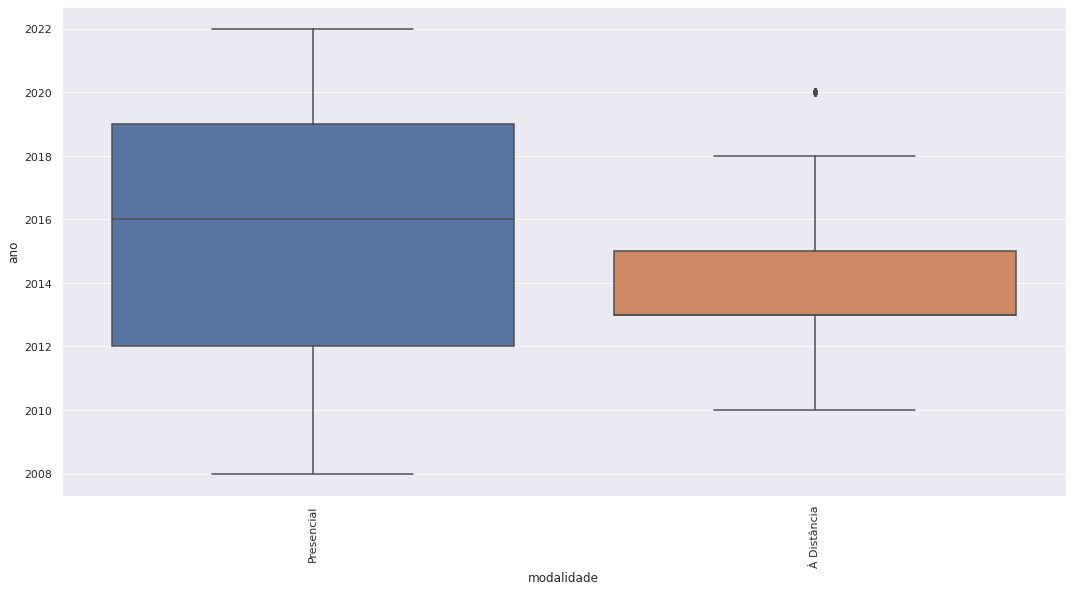

In [29]:
ax = sns.boxplot(x=df['modalidade'],y=df['ano'])
plt.xticks(rotation=90);

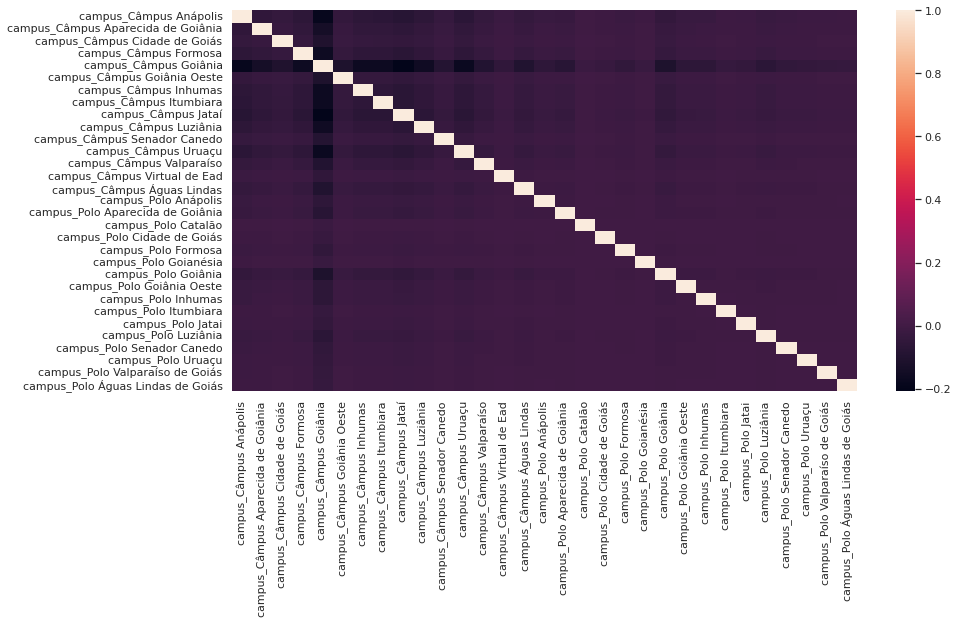

In [30]:
status = [x  for x in df_posprocessing.keys() if 'status' in x]
campus = [x  for x in df_posprocessing.keys() if 'campus' in x]
sns.set(rc={"figure.figsize":(14, 7)}) 

sns.heatmap(df_posprocessing[status + campus].corr());

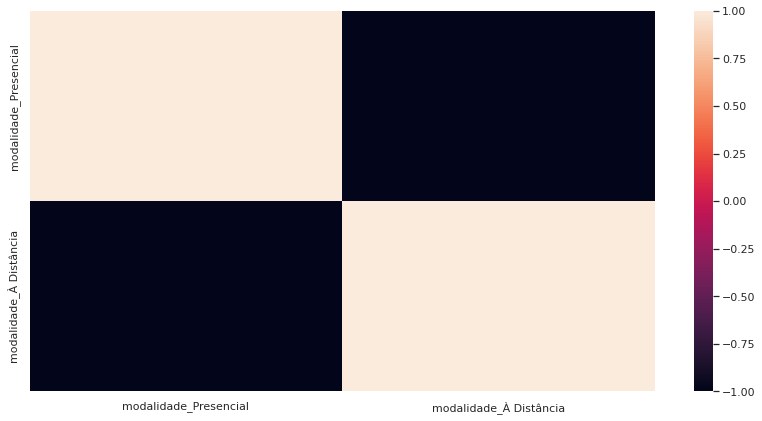

In [31]:
status = [x  for x in df_posprocessing.keys() if 'status' in x]
modalidade = [x  for x in df_posprocessing.keys() if 'modalidade' in x]
sns.heatmap(df_posprocessing[status+modalidade].corr());

(2005.0, 2025.0)

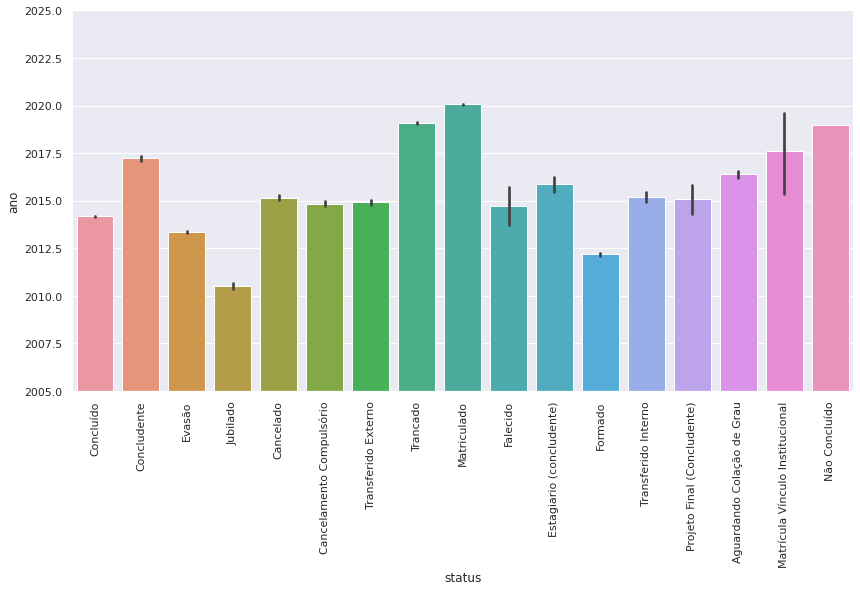

In [32]:
ax = sns.barplot(y="ano", x="status", data=df)
plt.xticks(rotation=90)
plt.ylim([2005,2025])

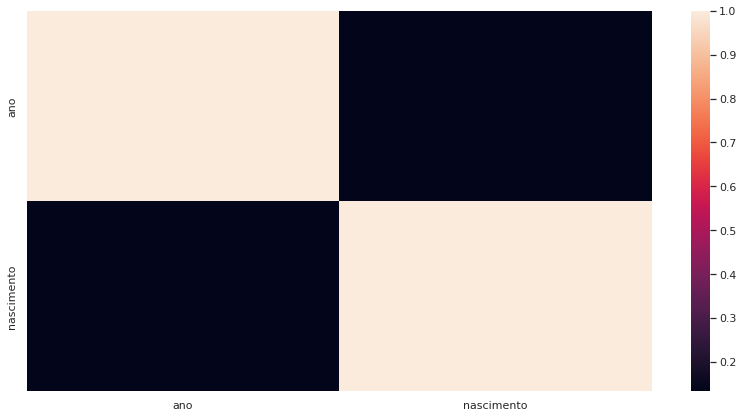

In [33]:
status = [x  for x in df_posprocessing.keys() if 'status' in x]
sns.heatmap(df_posprocessing[['ano','nascimento']+status].corr());

In [34]:
distancia = df[df['modalidade'] == 'À Distância']
presencial = df[df['modalidade'] != 'À Distância']

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


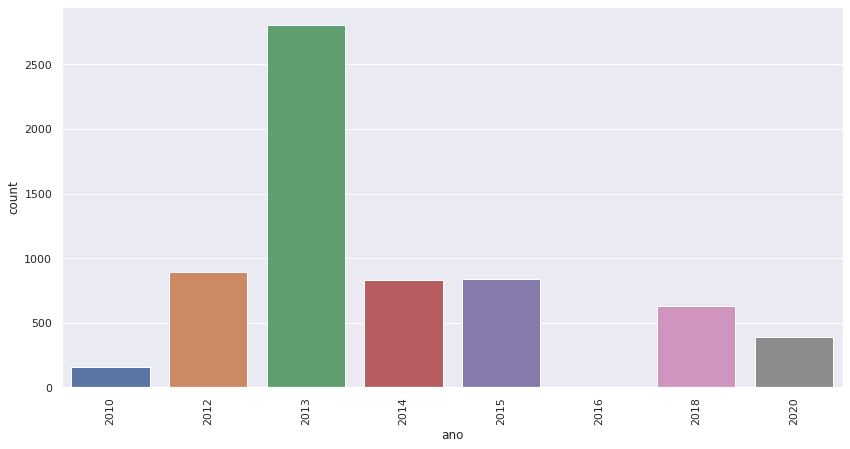

In [35]:
plot_count(distancia, 'ano')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


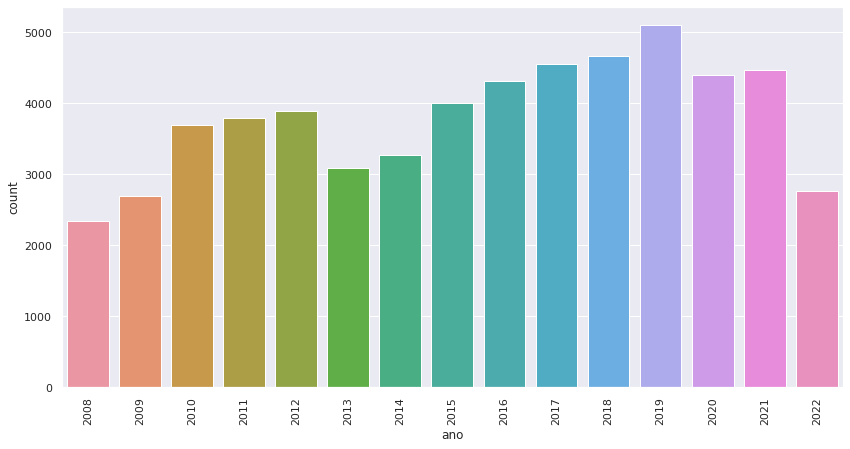

In [36]:
plot_count(presencial, 'ano')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


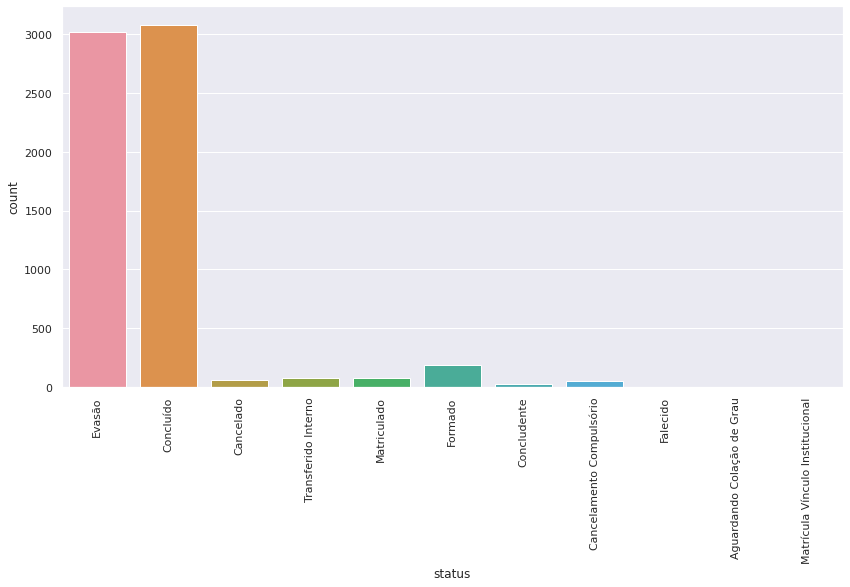

In [37]:
plot_count(distancia, 'status')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


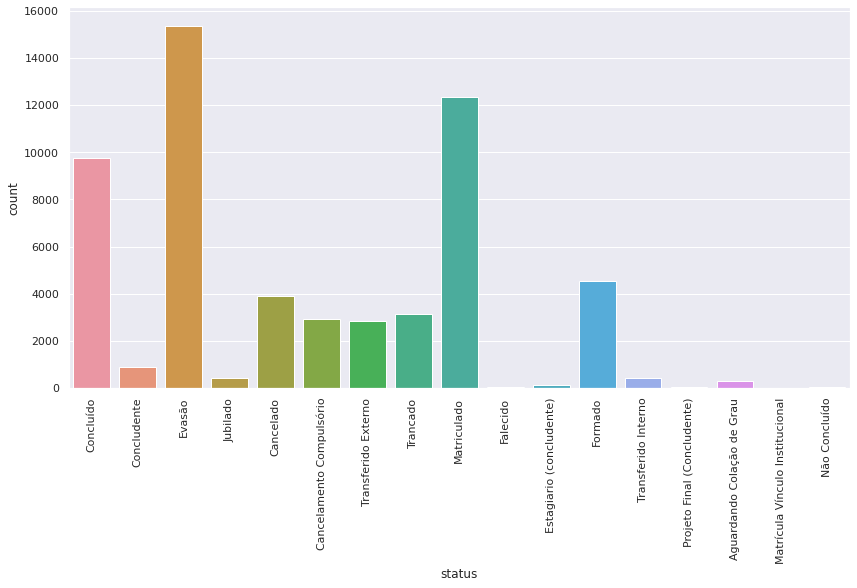

In [38]:
plot_count(presencial, 'status')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


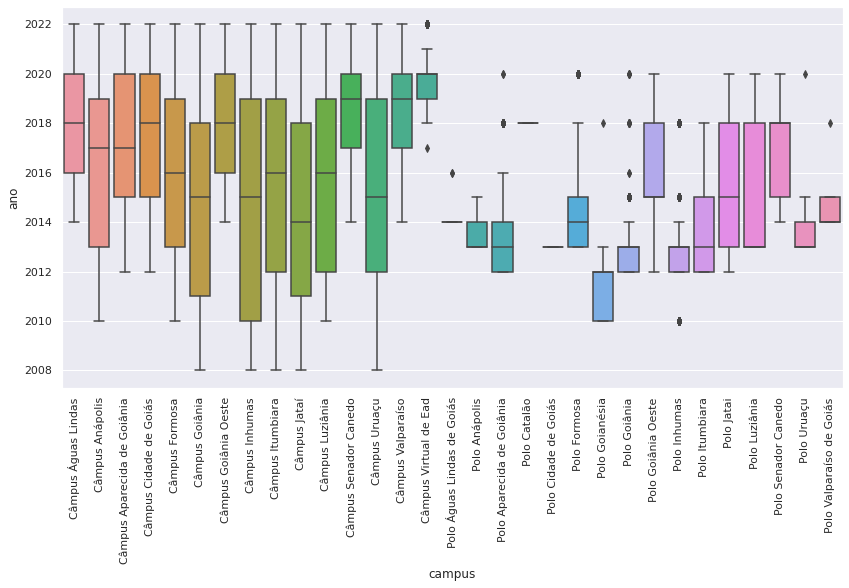

In [39]:
ax = sns.boxplot(df['campus'],df['ano'])
plt.xticks(rotation=90);

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


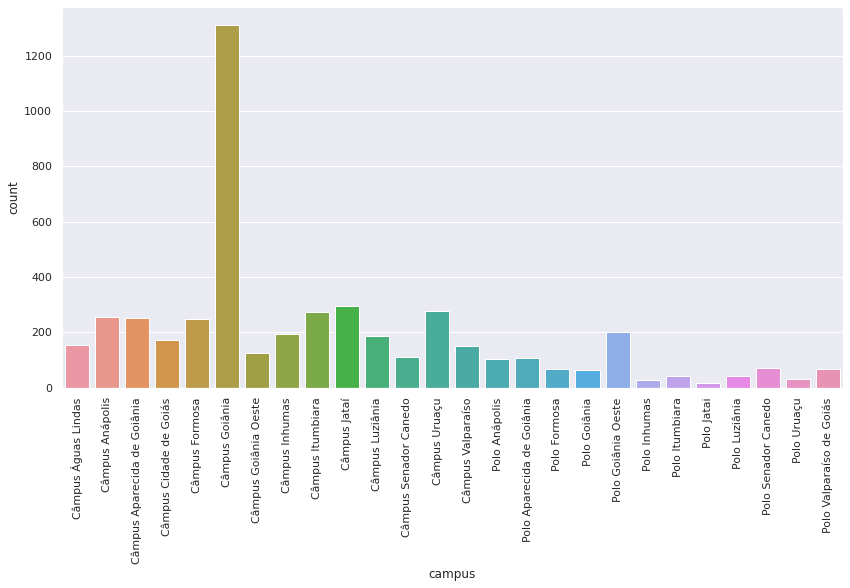

In [40]:
# verificando campus com mais alunos novos em 2013
plot_count(df[df['ano'] == 2015], 'campus')

In [41]:
def entrada_campus(df, campus):
    campus = df[df['campus'] == campus]
    sns.displot(campus['ano'], kde=True, height=8, aspect=2.5)
    plt.xticks(rotation=90)
    plt.show()

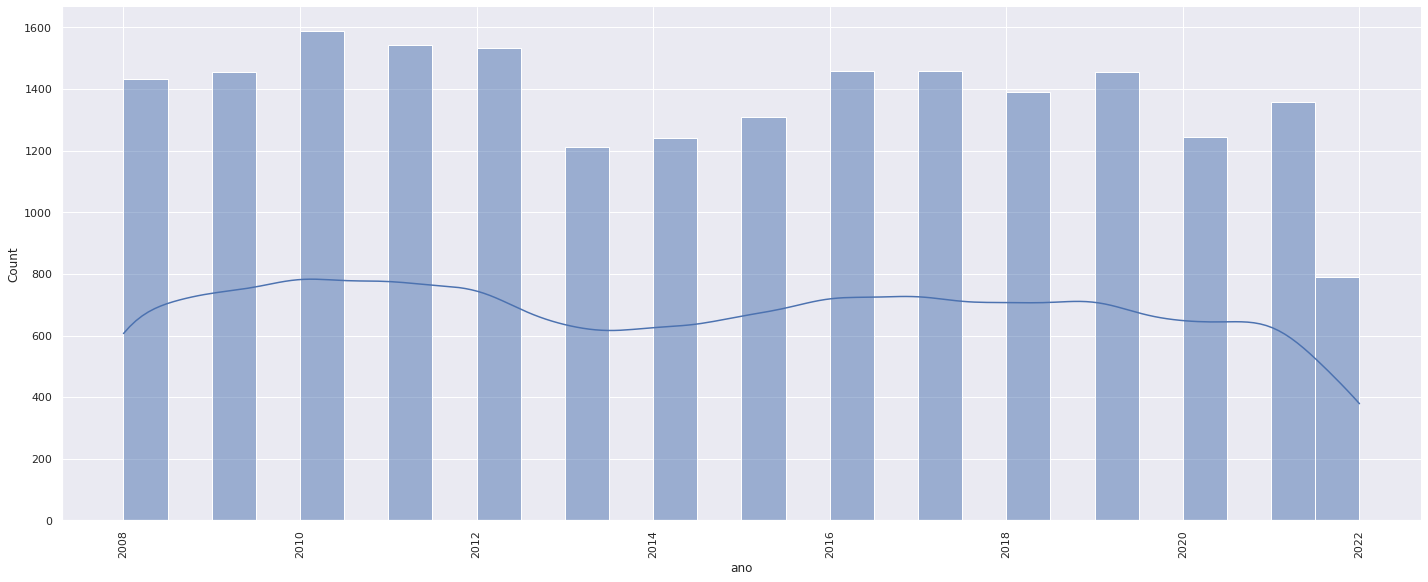

In [42]:
entrada_campus(df, 'Câmpus Goiânia')

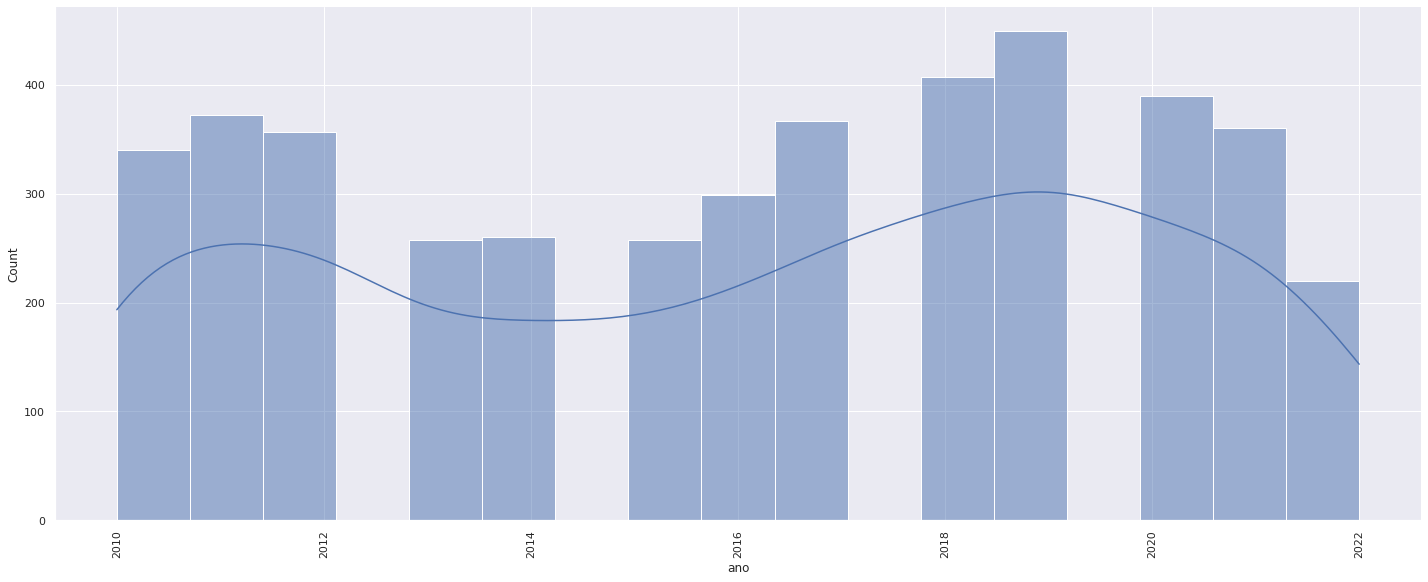

In [43]:
entrada_campus(df, 'Câmpus Anápolis')

In [44]:
evasao = df[df['status'] == 'Evasão']

In [45]:
evasao.count()

campus          18399
ano             18399
semestre        18399
curso           18399
tipo_curso      18399
modalidade      18399
sexo            18399
escolaridade    18399
cor             18399
nascimento      18399
status          18399
renda           18399
dtype: int64

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


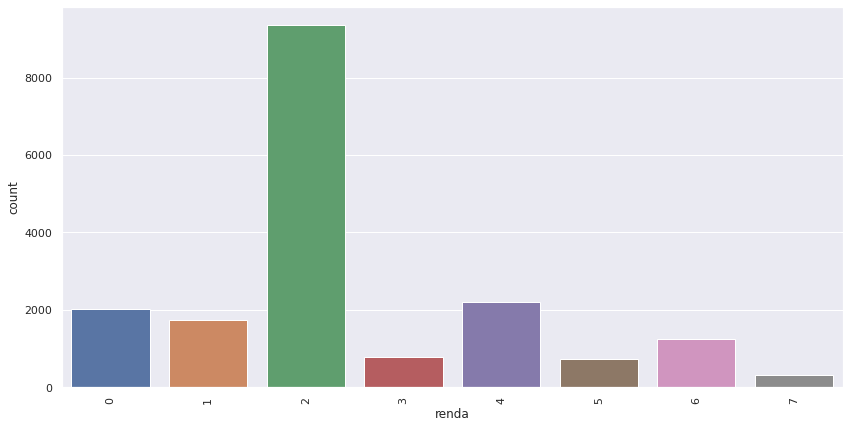

In [46]:
plot_count(evasao, 'renda')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


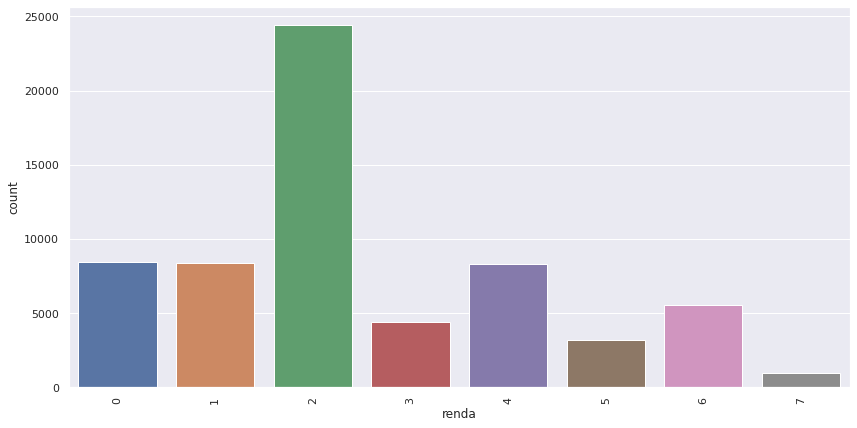

In [47]:
plot_count(df, 'renda')

In [48]:
classes

['1 Sm < Rfp <= 1,5 Sm',
 '1,5 Sm < Rfp <= 2,5 Sm',
 'Não Informado',
 'Rfp <= 0,5 Sm',
 '0,5 Sm < Rfp <= 1 Sm',
 '2,5 Sm < Rfp <= 3 Sm',
 'Rfp > 3 Sm',
 'Não Declarado']

In [49]:
sorted(df['ano'].unique())

[2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

## Questões a serem respondidas:

> Em escala qual o curso que teve maior aumento da taxa de evasão no decorrer do tempo?

In [50]:
query_df = lambda df, column, query: df[df[column] == query]

def taxa_evasao_ano(df, campus):
    campus = query_df(df, 'campus', campus)
    
    taxa_evasao = {}
    for ano in campus['nascimento'].unique():
        taxa = query_df(campus, 'nascimento', ano)
        taxa_evasao[ano] = query_df(taxa, 'status', 'Evasão').shape[0] / taxa.shape[0] * 100

    return taxa_evasao


In [51]:
def generete_color():
    return float(f'{random():0.1f}'), float(f'{random():0.1f}'), float(f'{random():0.1f}')

def plot_taxa(x, y, color, label):
    x = np.array(x)
    y = np.array(y)
 
    x_new = np.linspace(x.min(), x.max(), 200)

    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)

    plt.plot(
        x_new,
        y_smooth,
        color=color,
        label=label
    )

    plt.scatter(x, y, color=color)
    
    plt.xlabel('Ano')
    plt.ylabel('Taxa de Evasão (%)')
    
    plt.legend()

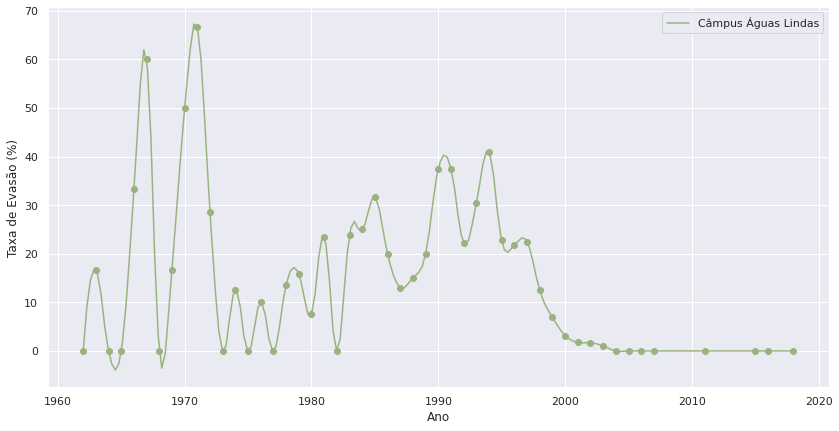

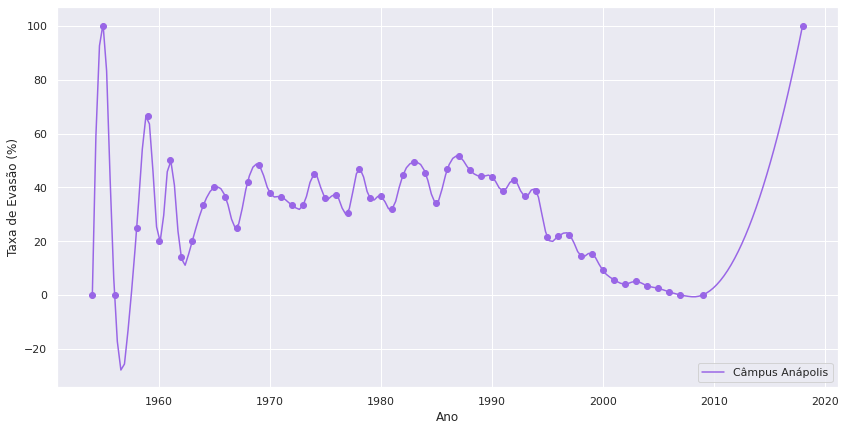

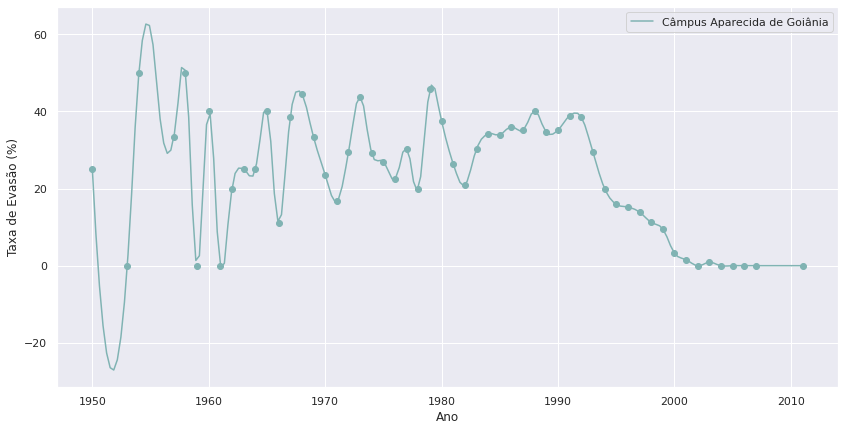

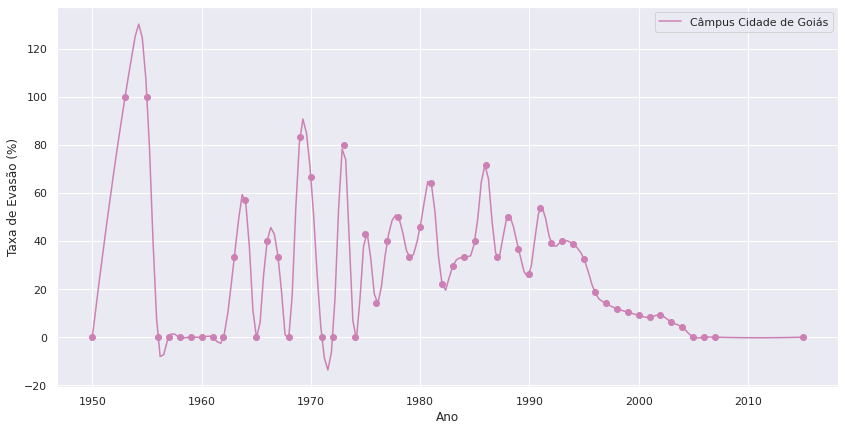

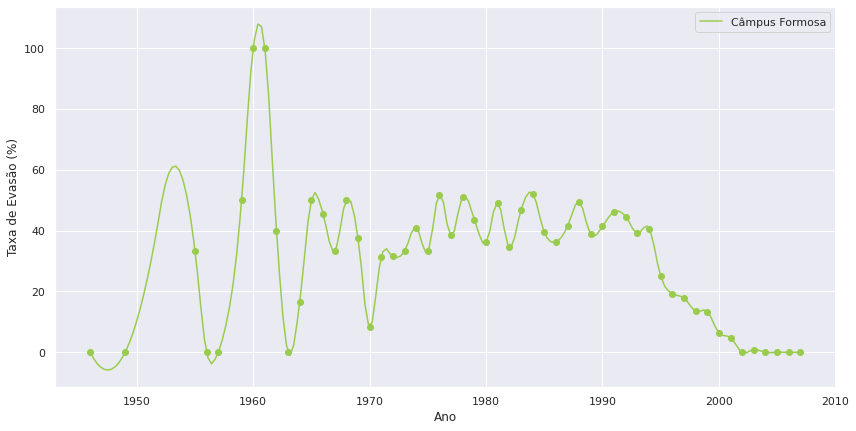

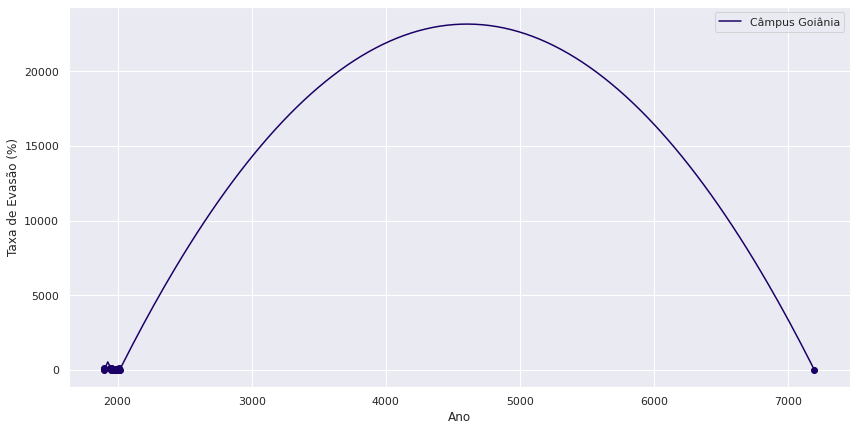

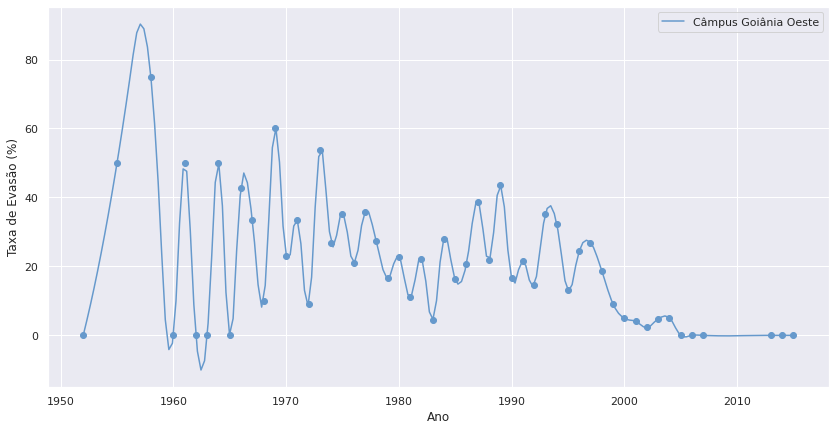

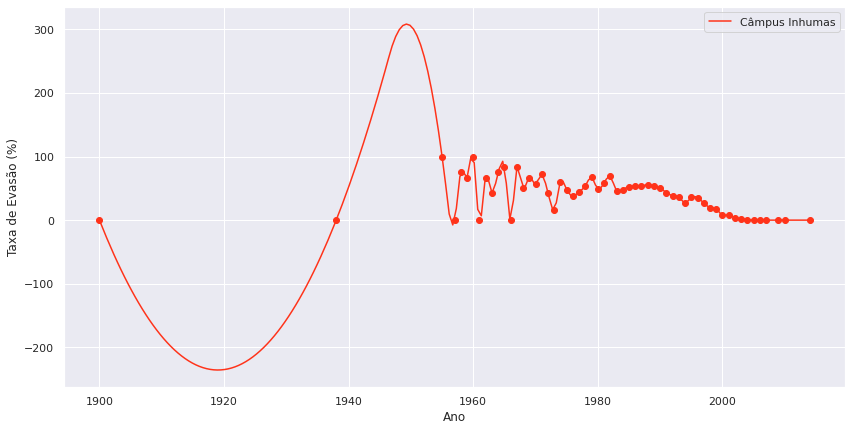

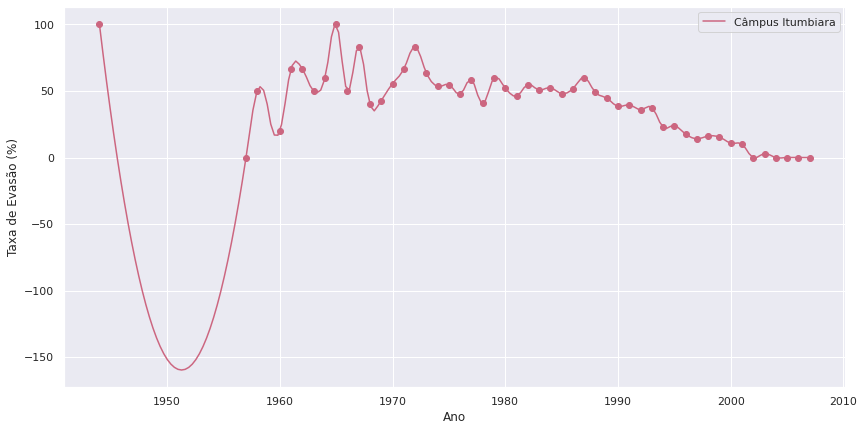

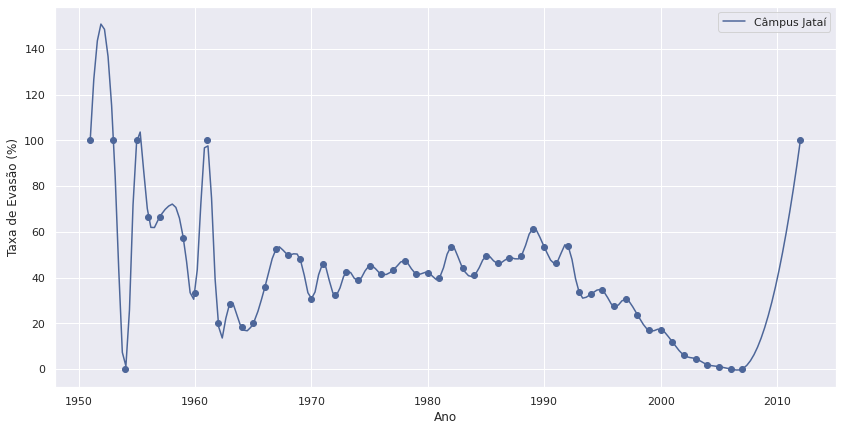

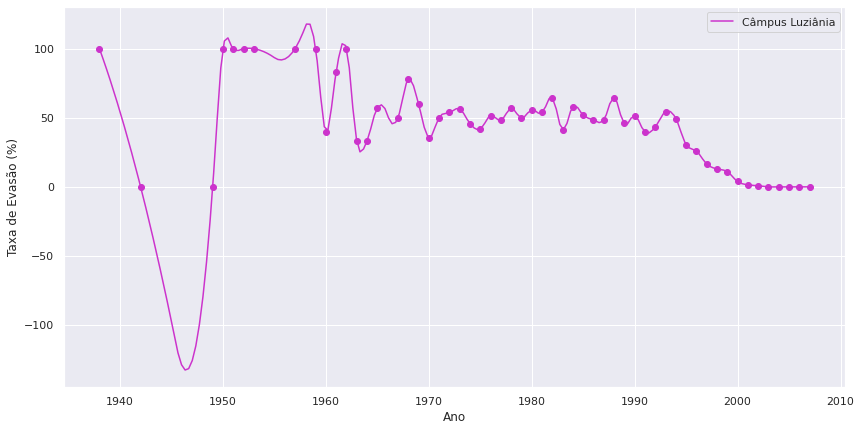

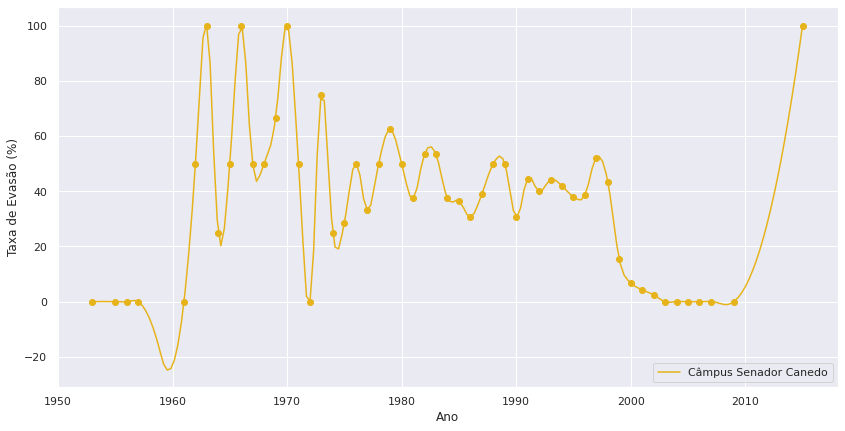

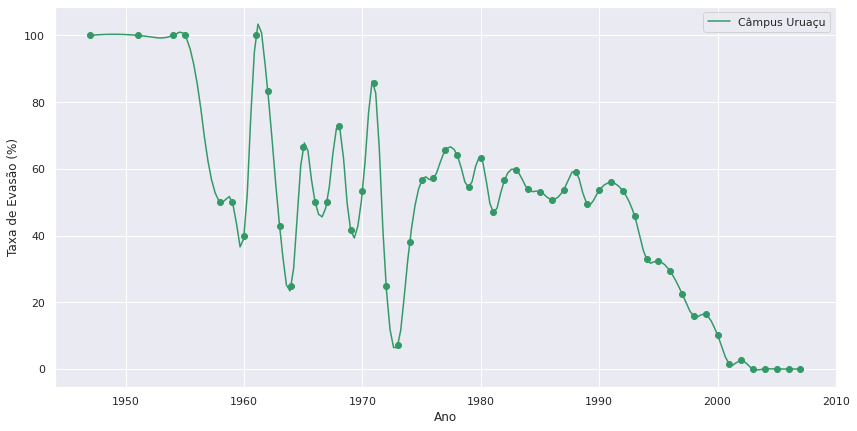

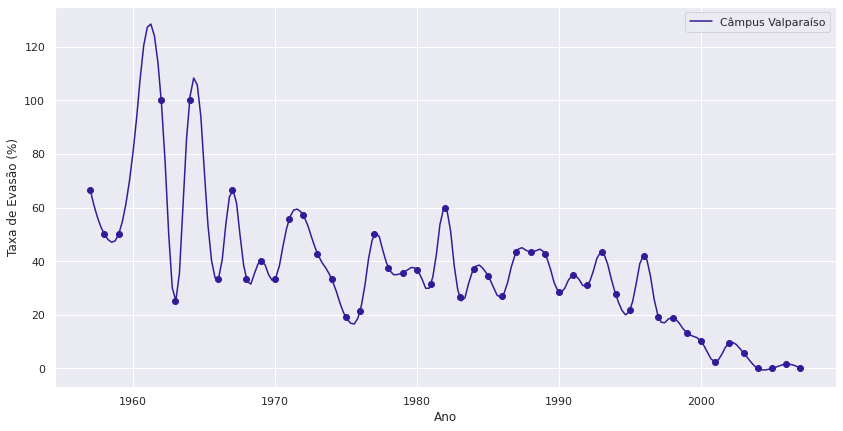

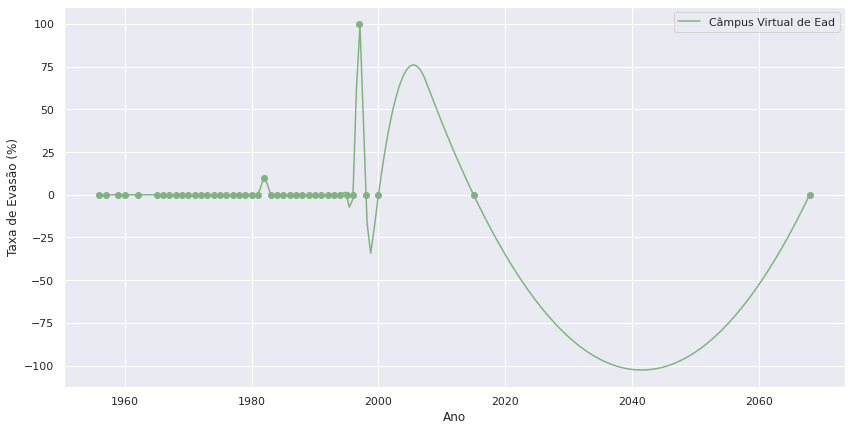

In [52]:
campus = presencial['campus'].unique()

taxa_campus = {}
for cam in campus:
    taxa_campus[cam] = taxa_evasao_ano(presencial, cam)
    x = list(taxa_campus[cam].keys())
    y = list(taxa_campus[cam].values())
    plot_taxa(
        x,
        y,
        color=generete_color(),
        label=cam
    )
    plt.show() # comentar essa linha para comparar todos os campus

df

In [53]:
df_posprocessing

,ano,semestre,nascimento,status,renda,campus_Câmpus Anápolis,campus_Câmpus Aparecida de Goiânia,campus_Câmpus Cidade de Goiás,campus_Câmpus Formosa,campus_Câmpus Goiânia,...,escolaridade_Pós-Graduação Lato Sensu,escolaridade_Pós-Graduação Stricto Sensu,escolaridade_Superior,cor_Amarela,cor_Branca,cor_Indígena,cor_Não dispõe da informação,cor_Não quis declarar cor/raça,cor_Parda,cor_Preta
0,0.428571,0.5,0.014911,Concluído,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.428571,0.5,0.016044,Concludente,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.428571,0.5,0.015100,Concluído,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.428571,0.5,0.016799,Evasão,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.428571,0.5,0.015289,Concluído,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63630,0.500000,1.0,0.016610,Evasão,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63631,0.500000,1.0,0.016610,Evasão,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63632,0.500000,1.0,0.016233,Evasão,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63633,0.500000,1.0,0.016610,Evasão,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
evasao = df[df['status'] == 'Evasão']
concluido = df[df['status'] == 'Concluído']
jubilado = df[df['status'] == 'Jubilado']
cancelamento_compulsorio  = df[df['status'] == 'Cancelamento Compulsório']
cancelado  = df[df['status'] == 'Cancelado']
formado  = df[df['status'] == 'Formado']
# set(df['status'])df_tarefa5
dfs = [concluido,jubilado,cancelado,cancelamento_compulsorio,formado]
df_tarefa5 = evasao
for i in range(len(dfs)):
    df_tarefa5 = df_tarefa5.append(dfs[i], ignore_index=True)


In [55]:
# pd.DataFrame(np.random.randn(8, 4),

#                   index=dates, columns=['A', 'B', 'C', 'D'])

In [56]:




for i in range(len(df_tarefa5['status'])):
    if df_tarefa5['status'][i] in ['Cancelado', 'Cancelamento Compulsório', 'Jubilado']:
         df_tarefa5['status'][i] = 'Evasão'
         
    if df_tarefa5['status'][i] == 'Formado':
         df_tarefa5['status'][i] = 'Concluído'

/tmp/ipykernel_55250/289994941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tarefa5['status'][i] = 'Evasão'
/tmp/ipykernel_55250/289994941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tarefa5['status'][i] = 'Concluído'


In [57]:
set(df_tarefa5['status'])

{'Concluído', 'Evasão'}

In [58]:
categoricos = [col for col in df.columns if col not in numericos and col != 'status']

df_tarefa5_pos = df_tarefa5.copy()

df_tarefa5_pos = df_tarefa5_pos.drop(columns=categoricos)

ohc = pd.get_dummies(df[categoricos])

df_tarefa5_pos[ohc.columns] = ohc
df_tarefa5_pos
categoricos

/home/filipe/.local/lib/python3.8/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


['campus',
 'curso',
 'tipo_curso',
 'modalidade',
 'sexo',
 'escolaridade',
 'cor',
 'renda']

In [59]:
# !pip install graphviz

In [60]:
# df.columns

[Text(0.4583333333333333, 0.875, 'campus_Câmpus Goiânia <= 0.5\nentropy = 0.974\nsamples = 43268\nvalue = [17541, 25727]'),
 Text(0.25, 0.625, 'campus_Câmpus Itumbiara <= 0.5\nentropy = 0.735\nsamples = 22804\nvalue = [4717, 18087]'),
 Text(0.16666666666666666, 0.375, 'campus_Câmpus Jataí <= 0.5\nentropy = 0.316\nsamples = 19181\nvalue = [1094, 18087]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.045\nsamples = 18176\nvalue = [89, 18087]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 1005\nvalue = [1005, 0]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 3623\nvalue = [3623, 0]'),
 Text(0.6666666666666666, 0.625, 'nascimento <= 1997.5\nentropy = 0.953\nsamples = 20464\nvalue = [12824, 7640]'),
 Text(0.5, 0.375, 'tipo_curso_Tecnólogo <= 0.5\nentropy = 0.998\nsamples = 14892\nvalue = [7796, 7096]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.943\nsamples = 11461\nvalue = [7324, 4137]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.578\nsamples = 3431\nvalue = [472,

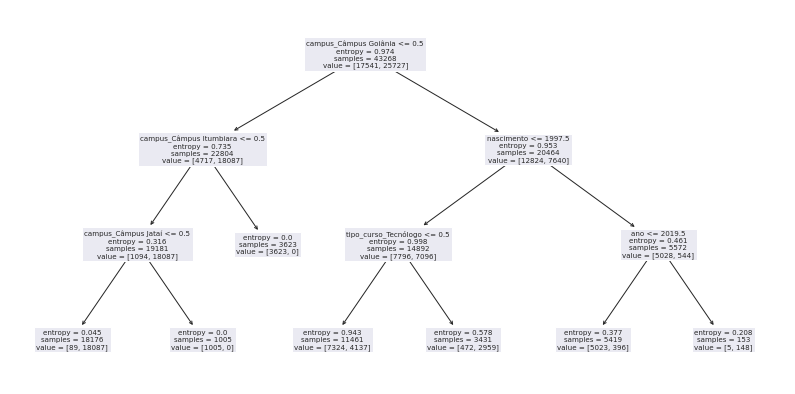

In [61]:
from sklearn import tree
df_tarefa5_pos = df_tarefa5_pos
X = df_tarefa5_pos.drop(['status'], axis=1)
Y = df_tarefa5_pos['status']
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3,criterion='entropy')
# RandomForestClassifier

clf = clf.fit(X, Y)

tree.plot_tree(clf,feature_names=X.columns)

In [62]:
for i in range(len(df_tarefa5['status'])):
    if df_tarefa5['status'][i] in ['Cancelado', 'Cancelamento Compulsório', 'Jubilado','Evasão']:
         df_tarefa5['status'][i] = 0.0
         
    if df_tarefa5['status'][i] in ['Formado','Concluído']:
         df_tarefa5['status'][i] = 1.0

/tmp/ipykernel_55250/4079357336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tarefa5['status'][i] = 0.0
/tmp/ipykernel_55250/4079357336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tarefa5['status'][i] = 1.0


In [63]:
df_tarefa5['status'] =   df_tarefa5['status'].astype(int)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X, Y)
# clf.feature_importances_
# plt.barh(feature_names, clf.feature_importances_)

# sorted_idx = clf.feature_importances_.argsort()
# sorted_idx = sorted_idx
# f2 = [X.columns[i]  for i in range(len(X.columns[sorted_idx])) if i in sorted_idx  ]
# plt.barh(f2, clf.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")


import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

X = df_tarefa5_pos.drop(['status'],axis=1).to_numpy()
y =  df_tarefa5['status'].to_numpy().reshape(-1,1)
skf = StratifiedKFold(n_splits=5,shuffle=True)
skf.get_n_splits(X, y)

print(skf)

# clf = RandomForestClassifier(random_state=0,max_features=0.99,max_samples=0.99,n_estimators=2)
clf = RandomForestClassifier(random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train,y_train)
    result = clf.predict(X_test)
    # print(y_test.shape)
    print(f1_score(y_test,result))

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)


/tmp/ipykernel_55250/3169788820.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


0.9542631281761715


/tmp/ipykernel_55250/3169788820.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


0.9503105590062112


/tmp/ipykernel_55250/3169788820.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


0.9509167842031029


/tmp/ipykernel_55250/3169788820.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


0.9559570863918689


/tmp/ipykernel_55250/3169788820.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


0.9541025278915408


In [65]:
def get_dataset():
	X = df_tarefa5_pos.drop(['status'],axis=1).to_numpy()[:1000]
	y =  df_tarefa5['status'].to_numpy().reshape(-1,1)[:1000]
	return X, y
 
def get_stacking():
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('rfc', RandomForestClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	level1 = LogisticRegression()
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
 
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['rfc'] = RandomForestClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
 
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='f1_micro', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

/home/filipe/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/filipe/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/filipe/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/filipe/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0